In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import pandas as pd
import numpy as np

from umap import UMAP
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

#Simple Util to draw plots

In [117]:
def make_plot(title, embeds, group, labels=['LBird on L', 'LBird on W', 'WBird on L', 'WBird on W'], 
              xlabel='UMAP Component 1',
              ylabel='UMAP Component 2', 
              size=0.3):
    fig, ax = plt.subplots()
    component_0 = embeds[:,0]
    component_1 = embeds[:,1]
    group = group
    size = size
    title = title
    labels = labels
    # legend = {0:'C0', 1:'C1'}

    for g in np.unique(group):

      idx = np.where(group == g)
      ax.scatter(component_0[idx], component_1[idx], label=labels[g], s=size,)  # c = legend[g],

    plt.rc('font', size=14) 
    ax.legend(fontsize=10)

    plt.title(title)


    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    fig = plt.gcf()
    plt.show()

#Feature visualize

## Feature superclass

In [83]:
df_features_sup = pd.read_csv('./features_super.csv', index_col=0)

In [84]:
features_sup = df_features_sup.drop(['label'], axis=1).values

In [85]:
reducer = UMAP(random_state=8, n_components=2)
embeds_sup = reducer.fit_transform(features_sup)


In [86]:
groups_sup =  df_features_sup['label'].values

In [87]:
silhouette_avg = silhouette_score(embeds_sup, groups_sup)

In [88]:
silhouette_avg

0.13741851

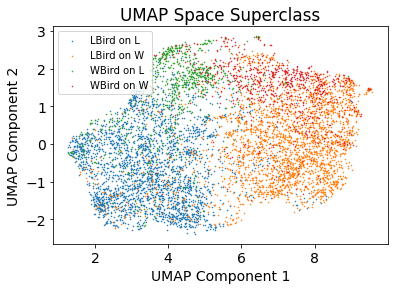

In [91]:
make_plot('UMAP Space Superclass', embeds_sup, groups_sup)

## Feature Subclass

In [78]:
df_features_sub = pd.read_csv('./features_sub.csv', index_col=0)
features_sub = df_features_sub.drop(['label'], axis=1).values
reducer = UMAP(random_state=8, n_components=2)
embeds_sub = reducer.fit_transform(features_sub)

In [79]:
groups_sub =  df_features_sub['label'].values

In [80]:
silhouette_avg = silhouette_score(embeds, groups_sub)

In [81]:
silhouette_avg

0.14383115

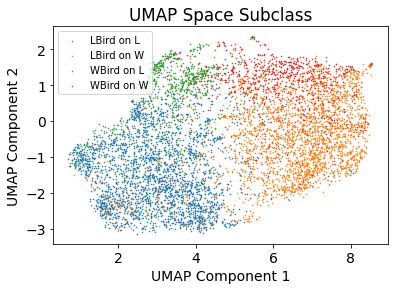

In [97]:
make_plot('UMAP Space Subclass', embeds_sub, groups_sub)

## Feature superclass balanced

In [118]:
df_features_supr = pd.read_csv('./features_super_r.csv', index_col=0)
features_supr = df_features_supr.drop(['label'], axis=1).values
reducer = UMAP(random_state=8, n_components=2)
embeds_supr = reducer.fit_transform(features_supr)

In [108]:
groups_supr =  df_features_supr['label'].values

In [109]:
silhouette_avg = silhouette_score(embeds_supr, groups_supr)
silhouette_avg

0.070114136

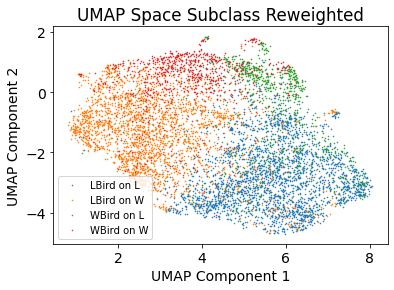

In [121]:
make_plot('UMAP Space Subclass Reweighted', embeds_supr, groups_supr)

## Feature Subclass balanced

In [98]:
df_features_subr = pd.read_csv('./features_sub_r.csv', index_col=0)
features_subr = df_features_subr.drop(['label'], axis=1).values
reducer = UMAP(random_state=8, n_components=2)
embeds_subr = reducer.fit_transform(features_subr)

In [99]:
groups_subr =  df_features_subr['label'].values

In [102]:
silhouette_avg = silhouette_score(embeds_subr, groups_subr)
silhouette_avg

0.16065896

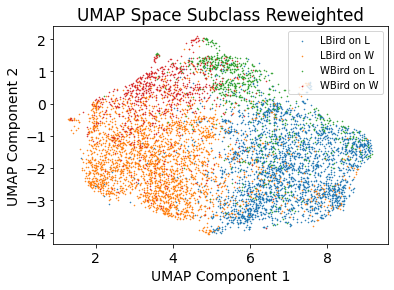

In [101]:
make_plot('UMAP Space Subclass Reweighted', embeds_subr, groups_subr)